<h1 style="text-align: center;" markdown="1">TP2: Ensamble FINAL</h1>
![](../data/icon_properati-data.png)

Se entrenaran varios algoritmos y se iran combinando en este mismo notebook.

In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

# modules
import knn as knnlibrary

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Obtener y limpiar dataset

In [2]:
properties =knnlibrary.get_dataset()
properties.head()

['properati-AR-2016-12-01-properties-sell.csv', 'properati-AR-2016-05-01-properties-sell.csv', 'properati-AR-2016-06-01-properties-sell.csv', 'properati-AR-2016-08-01-properties-sell.csv', 'properati-AR-2017-02-01-properties-sell.csv', 'properati-AR-2017-08-01-properties-sell-six_months.csv', 'properati-AR-2016-04-01-properties-sell.csv', 'properati-AR-2016-11-01-properties-sell.csv', 'properati-AR-2015-02-01-properties-sell-six_months.csv', 'properati-AR-2015-12-01-properties-sell-six_months.csv', 'properati-AR-2016-03-01-properties-sell-six_months.csv', 'properati-AR-2017-01-01-properties-sell.csv', 'properati-AR-2016-10-01-properties-sell.csv', 'properati-AR-2016-07-01-properties-sell.csv', 'properati-AR-2015-07-01-properties-sell-six_months.csv', 'properati-AR-2016-09-01-properties-sell.csv', 'properati-AR-2017-07-01-properties-sell-six_months.csv']


,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,ecc59daba3d5bc726ae8aa9dbccfe79635aef175,2016-06-01,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.5888560251,-58.4087713338",...,130.0,NaN,3461.538462,5.0,4.0,NaN,http://www.properati.com.ar/ys05_venta_departa...,UNIDAD AL FRENTE CON BALCON CORRIDO Y 2 COCHER...,IMPECABLE PISO DE 4 AMB + DEP Y 2 COCHERAS,https://thumbs4.properati.com/2/RbSA4pJRsv2S8M...
1,7f1423f29df530cae38e7a59ddc6430c7da7ca38,2016-06-01,sell,apartment,Once,|Argentina|Capital Federal|Once|,Argentina,Capital Federal,3430291.0,"-34.6033997612,-58.3984088548",...,46.0,NaN,2065.217391,1.0,1.0,NaN,http://www.properati.com.ar/ys06_venta_departa...,SE VENDE A ESTRENAR EN PLENO CORAZON DE ONCE !...,Excelentes oficinas a estrenar!!!!!,https://thumbs4.properati.com/8/IMCZ4CqITeOqx5...
2,4fdd84d998a3f82f4a3b36f405cc3f7013fb642e,2016-06-01,sell,store,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.595849,-58.386979",...,0.0,NaN,NaN,NaN,NaN,500.0,http://www.properati.com.ar/ys0r_venta_local_b...,Local en Venta sobre Avenida Santa Fe.Ideal pa...,Local sobre Av. Santa Fe,https://thumbs4.properati.com/9/-VNE04tbyVFfcO...
3,a786b4d9a8f6cc86ba3e839f4cb85bbb03cf15fd,2016-06-01,sell,house,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.796679,-58.3993149",...,0.0,1285.714286,NaN,NaN,6.0,NaN,http://www.properati.com.ar/ys10_venta_casa_ad...,CHALET INMEJORABLE UBICACIÓN: PLANTA BAJA: AMP...,IMPORTANTE CHALET ZONA MUY RESIDENCIAL,https://thumbs4.properati.com/5/FhMeTqvYjAiHVS...
4,9844244d17eb024e0632a63b4098b67889de06bc,2016-06-01,sell,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,3429979.0,NaN,...,120.0,1250.000000,1250.000000,NaN,4.0,NaN,http://www.properati.com.ar/ys1c_venta_casa_pi...,"Casa muy funcional, desarrollada en una sola p...",BAYUGAR PROPIEDADES/ LINDISIMA CASA/ BARRIO CA...,https://thumbs4.properati.com/2/dxU45Z8wqh3Mdq...


In [3]:
# completamos valores nan
from sklearn.preprocessing import Imputer
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
properties['floor'] = properties[['floor']].fillna(1)
properties['rooms'] = properties[['rooms']].fillna(1)

properties["lat"] = imputer_mean.fit_transform(properties[["lat"]])
properties["lon"] = imputer_mean.fit_transform(properties[["lon"]])

properties.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,ecc59daba3d5bc726ae8aa9dbccfe79635aef175,2016-06-01,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.5888560251,-58.4087713338",...,130.0,NaN,3461.538462,5.0,4.0,NaN,http://www.properati.com.ar/ys05_venta_departa...,UNIDAD AL FRENTE CON BALCON CORRIDO Y 2 COCHER...,IMPECABLE PISO DE 4 AMB + DEP Y 2 COCHERAS,https://thumbs4.properati.com/2/RbSA4pJRsv2S8M...
1,7f1423f29df530cae38e7a59ddc6430c7da7ca38,2016-06-01,sell,apartment,Once,|Argentina|Capital Federal|Once|,Argentina,Capital Federal,3430291.0,"-34.6033997612,-58.3984088548",...,46.0,NaN,2065.217391,1.0,1.0,NaN,http://www.properati.com.ar/ys06_venta_departa...,SE VENDE A ESTRENAR EN PLENO CORAZON DE ONCE !...,Excelentes oficinas a estrenar!!!!!,https://thumbs4.properati.com/8/IMCZ4CqITeOqx5...
2,4fdd84d998a3f82f4a3b36f405cc3f7013fb642e,2016-06-01,sell,store,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.595849,-58.386979",...,0.0,NaN,NaN,1.0,1.0,500.0,http://www.properati.com.ar/ys0r_venta_local_b...,Local en Venta sobre Avenida Santa Fe.Ideal pa...,Local sobre Av. Santa Fe,https://thumbs4.properati.com/9/-VNE04tbyVFfcO...
3,a786b4d9a8f6cc86ba3e839f4cb85bbb03cf15fd,2016-06-01,sell,house,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.796679,-58.3993149",...,0.0,1285.714286,NaN,1.0,6.0,NaN,http://www.properati.com.ar/ys10_venta_casa_ad...,CHALET INMEJORABLE UBICACIÓN: PLANTA BAJA: AMP...,IMPORTANTE CHALET ZONA MUY RESIDENCIAL,https://thumbs4.properati.com/5/FhMeTqvYjAiHVS...
4,9844244d17eb024e0632a63b4098b67889de06bc,2016-06-01,sell,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,3429979.0,NaN,...,120.0,1250.000000,1250.000000,1.0,4.0,NaN,http://www.properati.com.ar/ys1c_venta_casa_pi...,"Casa muy funcional, desarrollada en una sola p...",BAYUGAR PROPIEDADES/ LINDISIMA CASA/ BARRIO CA...,https://thumbs4.properati.com/2/dxU45Z8wqh3Mdq...


In [4]:
# filtro por CABA y GBA
properties_caba = properties[(properties['place_with_parent_names'].str.contains('Capital Federal') \
                             | properties['place_with_parent_names'].str.contains('Bs.As. G.B.A.'))]

properties_caba = properties_caba[properties_caba['price'].notnull() & properties_caba['price'] > 0 & properties_caba['place_name'].notnull()]

# eliminamos propiedades con mas de 54 pisos
properties_caba = properties_caba[properties_caba['floor'] <= 60]
# eliminamos propiedades con mas de 9 pisos - ver analisis
properties_caba = properties_caba[properties_caba['rooms'] <=  10]
# eliminamos propiedades con mas de 2000 m2 de superficie cubierta - ver analisis
properties_caba = properties_caba[(properties_caba['surface_covered_in_m2'] <= 4000) & (properties_caba['surface_covered_in_m2'] >= 0)]
# eliminamos propiedades con mas de 2000 m2 de superficie cubierta - ver analisis
properties_caba = properties_caba[(properties_caba['surface_total_in_m2']<= 6000)  & (properties_caba['surface_total_in_m2'] >= 0)]

properties_caba = knnlibrary.transform_date(properties_caba)
properties_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201534 entries, 3 to 80257
Data columns (total 30 columns):
id                            201534 non-null object
created_on                    201534 non-null object
operation                     201534 non-null object
property_type                 201534 non-null object
place_name                    201492 non-null object
place_with_parent_names       201534 non-null object
country_name                  201534 non-null object
state_name                    201534 non-null object
geonames_id                   160204 non-null float64
lat-lon                       141620 non-null object
lat                           201534 non-null float64
lon                           201534 non-null float64
price                         201534 non-null float64
currency                      201534 non-null object
price_aprox_local_currency    201534 non-null float64
price_aprox_usd               201534 non-null float64
surface_total_in_m2           201534

In [5]:
# filtro columnas segun lo que hay en el dataset
attributes = ['created_on_day','created_on_month','created_on_year','property_type','place_name','place_with_parent_names',\
              'country_name','state_name','lat','lon','surface_total_in_m2','surface_covered_in_m2',\
              'floor','rooms', 'price']
properties_caba[attributes].info()
properties_caba_with_price_attributes = properties_caba[attributes]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201534 entries, 3 to 80257
Data columns (total 15 columns):
created_on_day             201534 non-null int64
created_on_month           201534 non-null int64
created_on_year            201534 non-null int64
property_type              201534 non-null object
place_name                 201492 non-null object
place_with_parent_names    201534 non-null object
country_name               201534 non-null object
state_name                 201534 non-null object
lat                        201534 non-null float64
lon                        201534 non-null float64
surface_total_in_m2        201534 non-null float64
surface_covered_in_m2      201534 non-null float64
floor                      201534 non-null float64
rooms                      201534 non-null float64
price                      201534 non-null float64
dtypes: float64(7), int64(3), object(5)
memory usage: 24.6+ MB


In [6]:
from sklearn.preprocessing import LabelEncoder

properties_caba_with_price_attributes.fillna('NaN', inplace=True)
# atributos categoricos
encoder = LabelEncoder()

properties_caba_with_price_attributes['property_type'] = encoder.fit_transform(properties_caba_with_price_attributes[['property_type']])
#properties_caba_with_price_attributes['operation'] = encoder.fit_transform(properties_caba_with_price_attributes[['operation']])
properties_caba_with_price_attributes['place_name'] = encoder.fit_transform(properties_caba_with_price_attributes[['place_name']])
properties_caba_with_price_attributes['place_with_parent_names'] = encoder.fit_transform(properties_caba_with_price_attributes[['place_with_parent_names']])
properties_caba_with_price_attributes['country_name'] = encoder.fit_transform(properties_caba_with_price_attributes[['country_name']])
properties_caba_with_price_attributes['state_name'] = encoder.fit_transform(properties_caba_with_price_attributes[['state_name']])

# completamos valores nan
#from sklearn.preprocessing import Imputer
#imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
#properties_caba_with_price_attributes['floor'] = properties_caba_with_price_attributes[['floor']].fillna(1)
#properties_caba_with_price_attributes['rooms'] = properties_caba_with_price_attributes[['rooms']].fillna(1)

#properties_caba_with_price_attributes["lat"] = imputer_mean.fit_transform(properties_caba_with_price_attributes[["lat"]])
#properties_caba_with_price_attributes["lon"] = imputer_mean.fit_transform(properties_caba_with_price_attributes[["lon"]])

properties_caba_with_price_attributes.head()

/opt/conda/lib/python3.5/site-packages/pandas/core/frame.py:2762: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A

,created_on_day,created_on_month,created_on_year,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,price
3,1,6,2016,2,7,392,0,2,-34.796679,-58.399315,280.0,0.0,1.0,6.0,360000.0
4,1,6,2016,2,416,83,0,0,-34.713500,-59.164432,120.0,120.0,1.0,4.0,150000.0
5,1,6,2016,2,416,83,0,0,-34.470114,-58.887047,0.0,290.0,1.0,5.0,260000.0
6,1,6,2016,2,416,83,0,0,-34.476942,-58.879000,0.0,230.0,1.0,5.0,250000.0
7,1,6,2016,2,416,83,0,0,-34.439418,-58.925763,138.0,108.0,1.0,4.0,215000.0


In [7]:
# separamos el train de traing para validarlo luego usando un 20% de los datos
from sklearn.model_selection import train_test_split
import datetime

now = datetime.datetime.now()

columns = properties_caba_with_price_attributes.iloc[:, properties_caba_with_price_attributes.columns != 'price'].columns
print(columns)

X, y = properties_caba_with_price_attributes.iloc[:, properties_caba_with_price_attributes.columns != 'price'].values, properties_caba_with_price_attributes.iloc[:, properties_caba_with_price_attributes.columns == 'price'].values
X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=50)
    
len(X_test), len(X_train)

Index(['created_on_day', 'created_on_month', 'created_on_year',
       'property_type', 'place_name', 'place_with_parent_names',
       'country_name', 'state_name', 'lat', 'lon', 'surface_total_in_m2',
       'surface_covered_in_m2', 'floor', 'rooms'],
      dtype='object')


(40307, 161227)

In [8]:
# a cada dato le restamos la media y lo dividimos por su desviacion standard
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()

X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

X_std = stdsc.transform(X)

## Algoritmo 1: KNN

In [9]:
best_k = 5
best_p = 2

In [43]:
from sklearn.neighbors import KNeighborsRegressor
# busqueda de hiper-parametros
k_scores = []
k_list = []
p_list = []
labels = []

best_score = 0

for i in [22]:
    for p in [2,15,25,40]:
        knn = KNeighborsRegressor(n_neighbors=i, weights='distance', p=p)
        knn.fit(X_train_std, y_train)

        p_list.append(p)
        k_list.append(i)
        
        sc = knn.score(X_test_std, y_test)
        
        labels.append(str(round(sc,3)))
        k_scores.append(sc)
        
        if(sc > best_score):
            best_score = sc
            best_k = i
            best_p = p
            print("score=",best_score,"k=",best_k,"p=",best_p)

mu = np.mean(k_scores)
v = np.var(k_scores)

k_scores = list(map(lambda x: ((x-mu)/v)*50, k_scores))

score= 0.735471572114 k= 22 p= 2


5 2


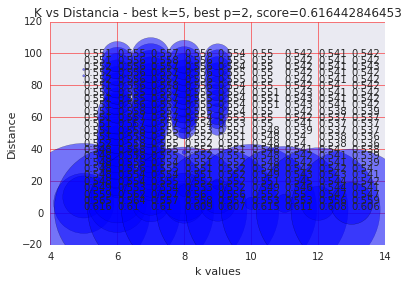

In [35]:
# graficamos
fig, ax = plt.subplots()
ax.scatter(k_list, p_list, s=k_scores, alpha=0.5)

title = "K vs Distancia - best k=%s, best p=%s, score=%s"%(best_k, best_p, best_score)
plt.title(title)
ylabel('Distance')
xlabel('k values')

for i, label in enumerate(labels):
    ax.annotate(label, (k_list[i],p_list[i]))

ax.grid(linestyle='-', linewidth='0.5', color='red')

#plt.savefig('/home/jovyan/work/TP/TP2/img/best_k=%s-best_p=%s-score=%s.png'%(best_k, best_p, best_score));

print(best_k, best_p)

In [10]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.neighbors import KNeighborsRegressor

model = KNeighborsRegressor(n_neighbors=best_k, weights='distance', p=best_p)
model.fit(X_train_std, y_train)

print('Training accuracy:', model.score(X_train_std, y_train))
print('Test accuracy:', model.score(X_test_std, y_test))
print("RMSE: ", sqrt(mean_squared_error(model.predict(X_test_std),y_test)))

Training accuracy: 0.956597422623
Test accuracy: 0.692079150635
RMSE:  363791.060128269


In [44]:
# entrenamos el modelo
model_knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance', p=best_p)
model_knn.fit(X_test_std, y_test)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=22, p=2,
          weights='distance')

## Algoritmo II: Random Forest

### RF con datos no-normalizados

In [38]:
# crossvalidation: max_depth, min_samples_*
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

hyperparameters = { 'max_depth': [10,30,50,70,90,100],
                    'min_samples_leaf': [5,10,15],
                    'min_samples_split': [5,10,15]}

model = RandomForestRegressor(n_estimators=100, max_features='auto')
clf = GridSearchCV(estimator=model, param_grid=hyperparameters , iid=False, cv=10, scoring='neg_mean_squared_error')

# Fit and tune model
clf.fit(X_train, y_train.ravel())

clf.grid_scores_, clf.best_params_, clf.best_score_

/opt/conda/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/opt/conda/lib/python3.5/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


([mean: -33541212554.38330, std: 16248307702.43759, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 5},
  mean: -33488184306.26409, std: 16301187654.12930, params: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5},
  mean: -35035329484.53563, std: 16401177089.94158, params: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 5},
  mean: -37422541072.42477, std: 16244407394.48372, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 10},
  mean: -37474200433.41467, std: 16588006068.28053, params: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10},
  mean: -37569916315.01438, std: 16410243779.76884, params: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 10},
  mean: -41397958145.92339, std: 16871433160.83206, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 15},
  mean: -41599834030.63509, std: 16619895273.71703, params: {'max_depth': 10, 'min_samples_split': 10, 'min_sa

In [39]:
# crossvalidation: n_estimators
hyperparameters = { 'n_estimators': [100,200,300,400,500,600,700,800,900,1000]}

model = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=50, min_samples_leaf=5, min_samples_split=5)
clf = GridSearchCV(estimator=model, param_grid=hyperparameters , iid=False, cv=10, scoring='neg_mean_squared_error')

# Fit and tune model
clf.fit(X_train, y_train.ravel())

clf.grid_scores_, clf.best_params_, clf.best_score_

([mean: -30179159717.86546, std: 15616066575.31117, params: {'n_estimators': 100},
  mean: -29980101261.24088, std: 15495720281.26892, params: {'n_estimators': 200},
  mean: -30101242564.30783, std: 15599592591.96099, params: {'n_estimators': 300},
  mean: -30017596032.08439, std: 15594394780.47940, params: {'n_estimators': 400},
  mean: -30032730656.95195, std: 15675222025.98391, params: {'n_estimators': 500},
  mean: -30018576786.31141, std: 15618697538.08820, params: {'n_estimators': 600},
  mean: -30020408361.69139, std: 15478325037.28069, params: {'n_estimators': 700},
  mean: -29984418077.06814, std: 15544471719.82263, params: {'n_estimators': 800},
  mean: -30016970160.54661, std: 15503366306.93305, params: {'n_estimators': 900},
  mean: -30055881702.86349, std: 15558616882.76456, params: {'n_estimators': 1000}],
 {'n_estimators': 200},
 -29980101261.240883)

In [40]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE: ", sqrt(mean_squared_error(clf.predict(X_test),y_test)))

RMSE:  195508.5831504827


In [12]:
# entrenamos el modelo
from sklearn.ensemble import RandomForestRegressor

model_rf1 = RandomForestRegressor(n_estimators=1000, max_features='auto', max_depth=50, min_samples_leaf=5, min_samples_split=5)
model_rf1.fit(X_train, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE: ", sqrt(mean_squared_error(model_rf1.predict(X_test),y_test)))

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


RMSE:  426350.1657869641


### RF con datos normalizados

In [ ]:
# crossvalidation: max_depth, min_samples_*
from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

hyperparameters = { 'max_depth': [10,30,50,70,90,100],
                    'min_samples_leaf': [5,10,15],
                    'min_samples_split': [5,10,15]}

model = RandomForestRegressor(n_estimators=100, max_features='auto')
clf = GridSearchCV(estimator=model, param_grid=hyperparameters , iid=False, cv=10, scoring='neg_mean_squared_error')

# Fit and tune model
clf.fit(X_train_std, y_train.ravel())

clf.grid_scores_, clf.best_params_, clf.best_score_

([mean: -33560509009.45726, std: 16139331957.76023, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 5},
  mean: -33487612627.29683, std: 16363183890.34245, params: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 5},
  mean: -34828791518.83158, std: 16399934876.30589, params: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 5},
  mean: -37875762403.64905, std: 16453476623.49070, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 10},
  mean: -37511667781.86235, std: 16433721353.32144, params: {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 10},
  mean: -37553579869.80670, std: 16387275532.88199, params: {'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 10},
  mean: -41533355975.70618, std: 16689520123.97775, params: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 15},
  mean: -41446288046.26664, std: 16732545965.57790, params: {'max_depth': 10, 'min_samples_split': 10, 'min_sa

In [ ]:
# crossvalidation: n_estimators
hyperparameters = { 'n_estimators': [100,200,300,400,500,600,700,800,900,1000]}

model = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=100, min_samples_leaf=5, min_samples_split=5)
clf = GridSearchCV(estimator=model, param_grid=hyperparameters , iid=False, cv=10, scoring='neg_mean_squared_error')

# Fit and tune model
clf.fit(X_train_std, y_train.ravel())

clf.grid_scores_, clf.best_params_, clf.best_score_

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE: ", sqrt(mean_squared_error(clf.predict(X_test_std),y_test)))

In [ ]:
# entrenamos el modelo
from sklearn.ensemble import RandomForestRegressor

model_rf2 = RandomForestRegressor(n_estimators=500, max_features='auto', max_depth=100, min_samples_leaf=5, min_samples_split=5)
model_rf2.fit(X_train_std, y_train)

from sklearn.metrics import mean_squared_error
from math import sqrt

print("RMSE: ", sqrt(mean_squared_error(model_rf2.predict(X_test_std),y_test)))

## ENSAMBLE

### Levantar set de test

In [24]:
# leemos set de test
test_df = pd.read_csv('../data/test/properati_dataset_testing_noprice.csv', low_memory=False)
test_df.head()

# transformamos atributos categoricos
test_df['country_name'] = encoder.fit_transform(test_df[['country_name']])
test_df['place_name'] = encoder.fit_transform(test_df[['place_name']])
test_df['state_name'] = encoder.fit_transform(test_df[['state_name']])
test_df['place_with_parent_names'] = encoder.fit_transform(test_df[['place_with_parent_names']])
test_df['property_type'] = encoder.fit_transform(test_df[['property_type']])

# tranformamos fechas
X_test_df = knnlibrary.transform_date(test_df)
X_test_df = X_test_df[['created_on_day','created_on_month','created_on_year','property_type','place_name','place_with_parent_names',\
              'country_name','state_name','lat','lon','surface_total_in_m2','surface_covered_in_m2',\
              'floor','rooms']]

# completamos valores nan
from sklearn.preprocessing import Imputer
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)
X_test_df['floor'] = X_test_df[['floor']].fillna(1)
X_test_df['rooms'] = X_test_df[['rooms']].fillna(1)

X_test_df["surface_total_in_m2"] = imputer_mean.fit_transform(X_test_df[["surface_total_in_m2"]])
X_test_df["surface_covered_in_m2"] = imputer_mean.fit_transform(X_test_df[["surface_covered_in_m2"]])
X_test_df["lat"] = imputer_mean.fit_transform(X_test_df[["lat"]])
X_test_df["lon"] = imputer_mean.fit_transform(X_test_df[["lon"]])

X_test_std_df = stdsc.transform(X_test_df)

X_test_df.head()

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:22:

,created_on_day,created_on_month,created_on_year,property_type,place_name,place_with_parent_names,country_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms
0,24,8,2017,1,152,219,0,4,-34.610988,-58.363464,0.0,359.471588,1.0,1.0
1,25,8,2017,1,29,180,0,3,-34.629923,-58.465820,0.0,359.471588,1.0,1.0
2,1,8,2017,1,136,210,0,4,-34.589363,-58.412880,53.0,48.000000,1.0,1.0
3,1,8,2017,1,40,193,0,4,-34.629923,-58.465820,39.0,39.000000,1.0,1.0
4,1,8,2017,1,40,193,0,4,-34.629923,-58.465820,51.0,51.000000,1.0,1.0


### Predecir y ensamblar

In [45]:
y_knn = model_knn.predict(X_test_std_df)
y_rf1 = model_rf1.predict(X_test_df)
#y_rf2 = model_rf2.predict(X_test_std_df)

In [46]:
print(y_knn)
print(y_rf1)

[[ 823732.83917028]
 [ 494055.38854569]
 [ 281186.687023  ]
 ..., 
 [ 102390.05263879]
 [ 143755.79269069]
 [ 256468.1750703 ]]
[ 728407.5257215   633828.8282558   280610.35915153 ...,  197525.14783418
  281048.31282711  380403.97123044]


Tener en cuenta para el ensamble cuales fueron los RMSE de cada algoritmo asi le damos un peso acorde a los errores de cada modelo

In [62]:
# ensamble
C1 = 0.2
C2 = 0.4
C3 = 0.4

y_final = []
for row1,row2,row3 in zip(y_knn,y_rf1,y_rf2):
    y_final.append(C1 * float(row1) + C2 * float(row2) + C3 * float(row3))

In [47]:
# ensamble
C1 = 1
C2 = 0

y_final = []
for row1,row2 in zip(y_knn,y_rf1):
    y_final.append((C1 * float(row1) + C2 * float(row2)) )

In [48]:
print(y_final)

[823732.839170278, 494055.3885456914, 281186.6870229954, 440821.25581608975, 440178.2188378353, 440821.25581608975, 440821.25581608975, 440821.25581608975, 440161.93915440486, 441300.010122616, 441300.010122616, 441300.010122616, 286950.47951141634, 187870.58992040408, 780677.1017173299, 780677.1017173299, 780677.1017173299, 780677.1017173299, 780677.1017173299, 780677.1017173299, 780677.1017173299, 780677.1017173299, 887339.6223140705, 887430.9116050978, 887430.9116050978, 887430.9116050978, 887430.9116050978, 780677.1017173299, 780677.1017173299, 780812.9486022432, 780812.9486022432, 780812.9486022432, 780812.9486022432, 780812.9486022432, 780677.1017173299, 780812.9486022432, 780812.9486022432, 780677.1017173299, 780677.1017173299, 780677.1017173299, 780677.1017173299, 443955.8029036513, 435629.9637086127, 286950.47951141634, 286950.47951141634, 440996.71462127037, 445644.4498151493, 227663.1914441834, 209687.5881067927, 293723.72203008924, 240224.16662761907, 293766.2580647819, 293

In [50]:
# escribir al archivo
output = pd.DataFrame( data={"id":test_df["id"], "price_usd":y_final} )
output.to_csv( "../data/result/ensamblev02_knn_"+str(now)+".csv", index=False, quoting=3 )